- Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.



- Exercici 2
Compara’ls en base al MSE i al R2.



- Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.



- Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).



- Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

# Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import graphviz 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df=pd.read_csv("housing data.csv",names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000$
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


In [3]:
#Comprovar si falten dades
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

MEDV       0.0
LSTAT      0.0
B          0.0
PTRATIO    0.0
TAX        0.0
RAD        0.0
DIS        0.0
AGE        0.0
RM         0.0
NOX        0.0
CHAS       0.0
INDUS      0.0
ZN         0.0
CRIM       0.0
dtype: float64

In [4]:
diccionari = {'CRIM':'per capita crime rate by town',
              'ZN':'proportion of residential land zoned for lots over 25,000 sq.ft',
             'INDUS':'proportion of non-retail business acres per town',
             'CHAS':'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
             'NOX':'nitric oxides concentration (parts per 10 million)',
             'RM':'average number of rooms per dwelling',
             'AGE':'proportion of owner-occupied units built prior to 1940',
             'DIS':'weighted distances to five Boston employment centres',
             'RAD':'index of accessibility to radial highways',
             'TAX':'full-value property-tax rate per $10,000',
             'PTRATIO':'pupil-teacher ratio by town',
             'B':'1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
             'LSTAT':'% lower status of the population',
             'MEDV':'Median value of owner-occupied homes in $1000\'s'}

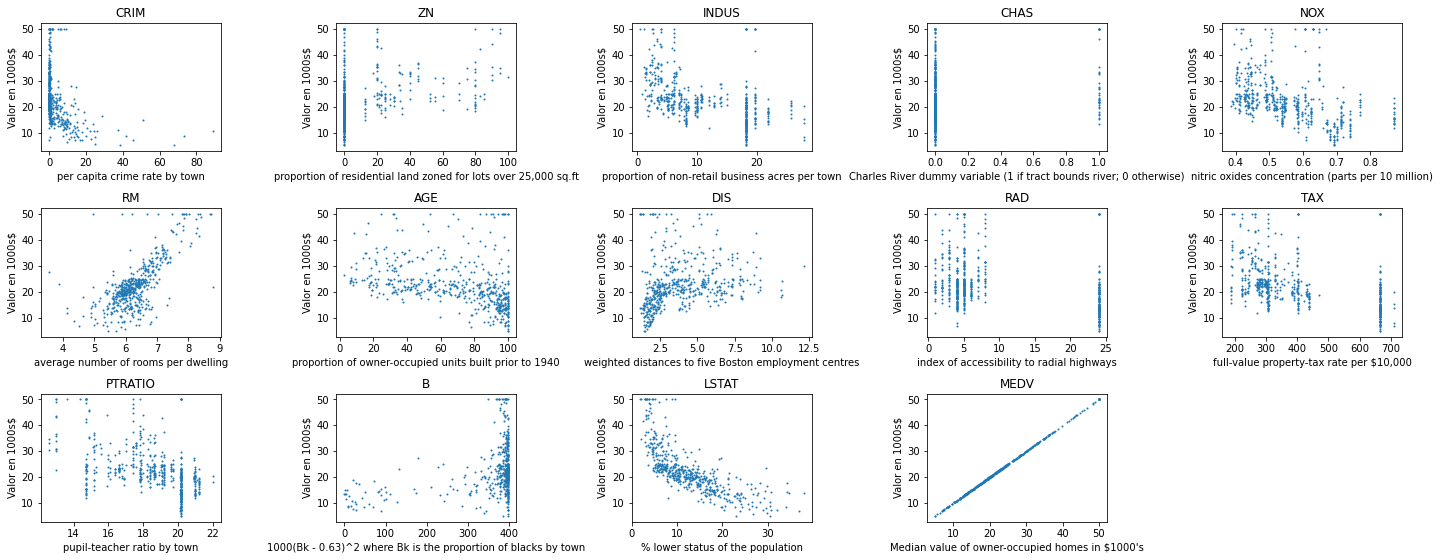

In [5]:
#Visualitzar la relació entre cada atribut i el valor de la vivenda
i = 0
plt.rcParams["figure.figsize"] = (20,10)

for columna in df:
    plt.subplot(4, 5, i+1)
    plt.scatter(df[columna], df['MEDV'],s=1)
    plt.title(columna)
    plt.ylabel('Valor en 1000s$')
    plt.xlabel(diccionari[columna])   
    
    i+=1

plt.tight_layout(pad=1)

Text(0, 0.5, 'nº')

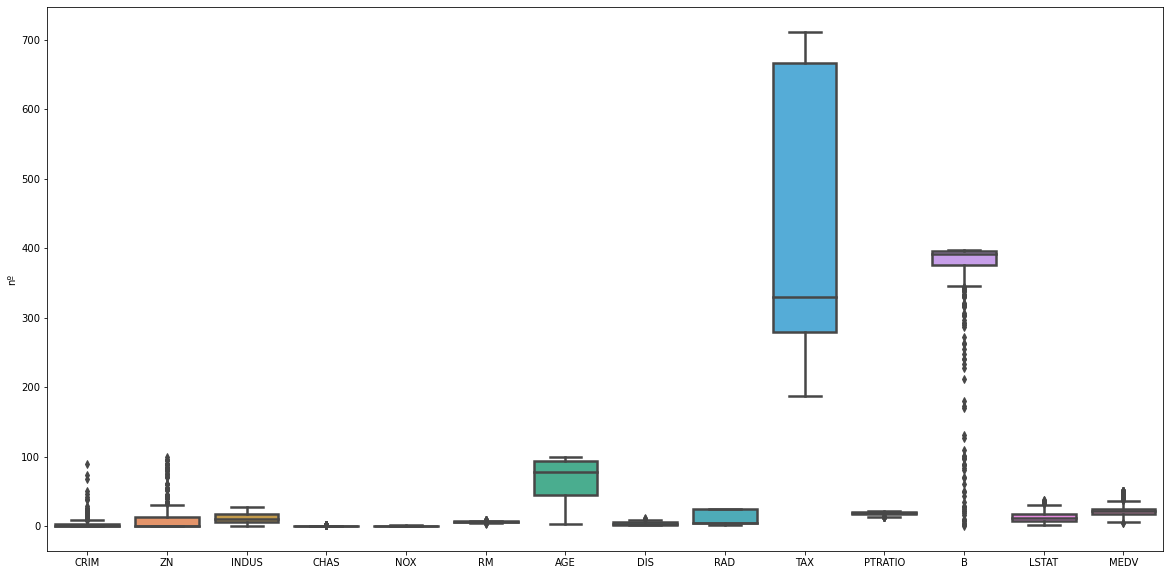

In [6]:
#Comprovar si hi ha outliers 
sns.boxplot(data=df,linewidth=2.5)
plt.ylabel('nº')

In [7]:
#Ordenar les dades en dues matrius X (vars independents) i y (var dependent)
X = []
x = []
for i in range(len(df)):
    for columna in df.iloc[:,:-1]:
        x.append(df.loc[i,columna])
    X.append(x)
    x=[]

y = np.array(df['MEDV'])

### Regressió Lineal Múltiple:

In [8]:
#Crear el model de regressió:
rlm = LinearRegression()
rlm = rlm.fit(X, y)

r_rlm = rlm.score(X, y)
interseccio = rlm.intercept_
coeficients = rlm.coef_

print('R2:',"{:.3f}".format(r_rlm),'\nB0:',"{:.3f}".format(interseccio))

i=1
for n in coeficients:
    print('B',i,": {:.3f}".format(n),sep='')
    i+=1

R2: 0.741 
B0: 36.459
B1: -0.108
B2: 0.046
B3: 0.021
B4: 2.687
B5: -17.767
B6: 3.810
B7: 0.001
B8: -1.476
B9: 0.306
B10: -0.012
B11: -0.953
B12: 0.009
B13: -0.525


### Arbre de Regressió

In [9]:
#Separar una part de les dades pel testeig
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

#Crear l'arbre de regressió
ar = tree.DecisionTreeRegressor(random_state=42)
ar = ar.fit(X_train, y_train)

#Coeficient de determinació
r_ar = ar.score(X_test,y_test)

'arbre de regressió.pdf'

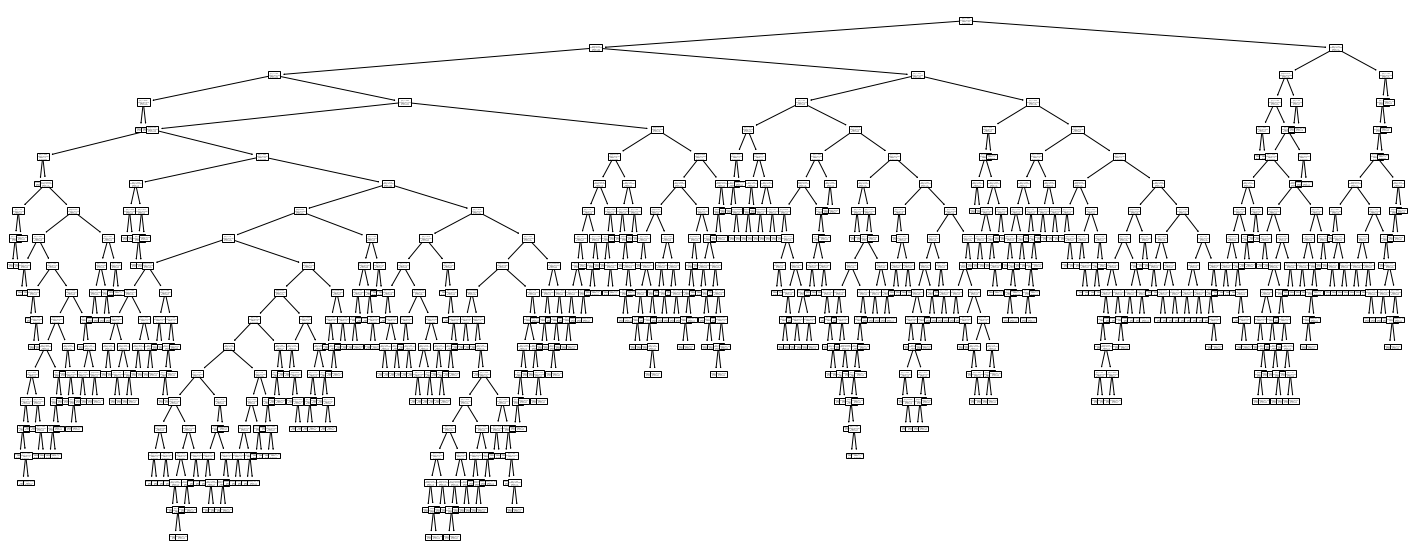

In [10]:
#Representació gràfica de l'arbre
fig = plt.figure(figsize=(25,10))
tree.plot_tree(ar)

#Guardar el gràfic en un arxiu pdf per veure'l millor
graph = graphviz.Source(tree.export_graphviz(ar, out_file=None)) 
graph.render("arbre de regressió") 

### Random Forest

In [28]:
#Generació del model de regressió
rf = RandomForestRegressor(random_state=42)
rf = rf.fit(X_train, y_train)

#Coeficient de regressió
r_rf = rf.score(X_test, y_test)

'arbre random forest.pdf'

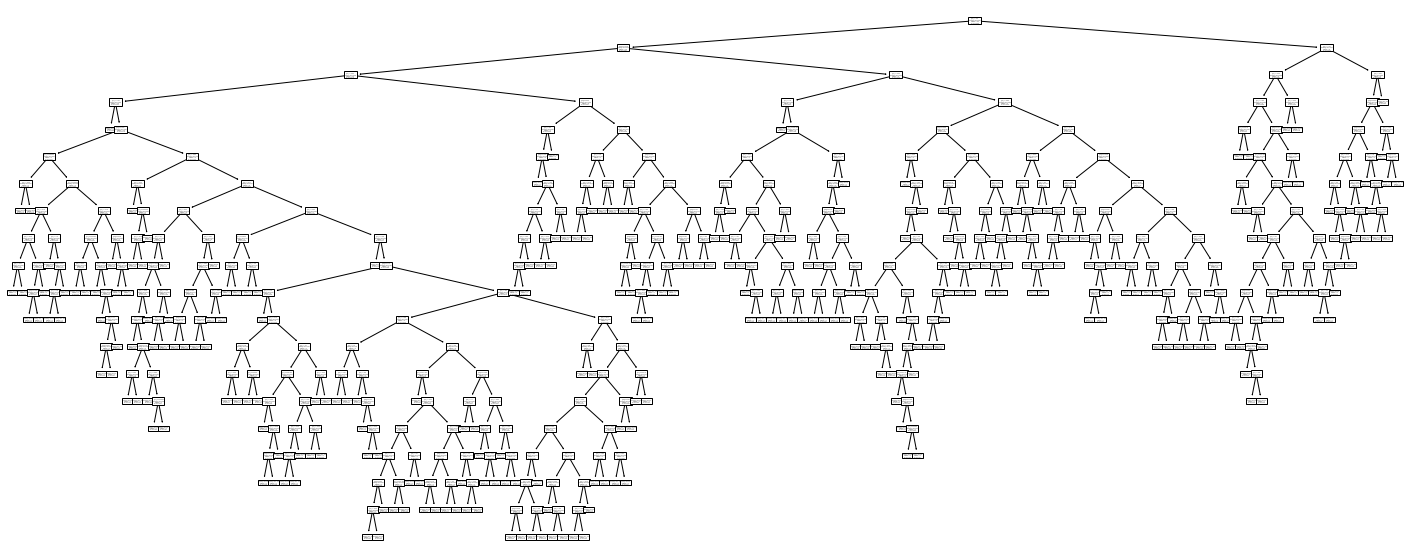

In [12]:
#Representació gràfica d'un dels arbres generats pel model
arbre = rf.estimators_[10]

fig = plt.figure(figsize=(25,10))
tree.plot_tree(arbre)

#Guardar el gràfic en un arxiu pdf per veure'l millor
graph = graphviz.Source(tree.export_graphviz(arbre, out_file=None) ) 
graph.render("arbre random forest") 

# Exercici 2

Comparar MSE i R2.

In [13]:
#Prediccions a partir de les dades de testeig, i matriu d'errors
#Regressió lineal múltiple
y_pred_rlm = rlm.predict(X_test)
error_rlm = []
for i in range(len(y_pred_rlm)):
    error_rlm.append(y_pred_rlm[i]-y_test[i])

#Arbre de regressió
y_pred_ar = ar.predict(X_test)
error_ar=[]
for i in range(len(y_pred_ar)):
    error_ar.append(y_pred_ar[i]-y_test[i])

#Random forest
y_pred_rf = rf.predict(X_test)
y_pred_rf
error_rf=[]
for i in range(len(y_pred_rf)):
    error_rf.append(y_pred_rf[i]-y_test[i])

In [29]:
#Càlcul de Mean Square Error: 1/n*sum(errors^2)
#Regressió lineal múltiple
sumatori = 0
for i in error_rlm:
    sumatori += i**2
MSE_rlm = 1/len(y_test)*sumatori
#o també es pot fer:
MSE_rlm = mean_squared_error(y_test, y_pred_rlm)

#Arbre de regressió
sumatori = 0
for i in error_ar:
    sumatori += i**2
MSE_ar = 1/len(y_test)*sumatori
#O també es pot fer:
MSE_ar = mean_squared_error(y_test, y_pred_ar)

#Random forest
sumatori = 0
for i in error_rf:
    sumatori += i**2
MSE_rf = 1/len(y_test)*sumatori
#O també es pot fer
MSE_rf = mean_squared_error(y_test, y_pred_rf)

print('MSE regressió multiple:', MSE_rlm, '\nMSE arbre regressió:   ', MSE_ar, '\nMSE random forest:     ', MSE_rf, '\nR2 regressió multiple: ', r_rlm, '\nR2 arbre regressió:    ', r_ar, '\nR2 random forest:      ', r_rf)

MSE regressió multiple: 13.82201318764566 
MSE arbre regressió:    34.196078431372555 
MSE random forest:      9.217656627450989 
R2 regressió multiple:  0.7406426641094094 
R2 arbre regressió:     0.45228626639095415 
R2 random forest:       0.8108849853071037


En coeficient de determinació R2 indica com s'ajusten les dades al model de regressió, contra més alt més s'ajusta, sense passar-se perquè sino hi ha overfitting, i el Mean Squared Error indica la quantitat d'error del model, contra més petit més precís és, per tant el millor model de regressió serà aquell que té un MSE menor i un R2 major, en aquest cas la regressió en random forest té un error menor i un coeficient de determinació major.

# Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

Modificat de: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

### Randrom Forest:

In [15]:
print('Paràmetres del random forest:')
pprint(rf.get_params())

Paràmetres del random forest:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [16]:
#Paràmetres a modificar
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [17]:
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor(random_state=42)

# Random search of parameters, usin 3 fold cross validation, search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

#Millors hiperparàmetres
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1400,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'bootstrap': True}

In [18]:
#Funció per evaluar el model
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    MSE = mean_squared_error(test_labels, predictions)
    accuracy = 100 - mape
    print('R2: {:0.4f}.'.format(model.score(test_features, test_labels)))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy: {:0.2f}%.'.format(accuracy))
    print('MSE: {:0.4f}.'.format(MSE))
    return accuracy

#Comparació de models
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
print('Model base:')
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
print('\nModel ajustat:')
random_accuracy = evaluate(best_random, X_test, y_test)

print('\nImprovement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model base:
R2: 0.8524.
Average Error: 1.8915 degrees.
Accuracy: 89.84%.
MSE: 9.2177.

Model ajustat:
R2: 0.8616.
Average Error: 1.9116 degrees.
Accuracy: 89.79%.
MSE: 8.6415.

Improvement of -0.06%.


### Arbre de Regressió:

In [19]:
print('Parametres del model de l\'arbre de regressió:')
pprint(ar.get_params())

Parametres del model de l'arbre de regressió:
{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}


In [20]:
#Paràmetres a modificar
splitter = ["best","random"]
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
min_weight_fraction_leaf = [0.01,0.05,0.1,0.2,0.3,0.4,0.5]
max_features = ["log2","sqrt",None]
max_leaf_nodes = [None,10,20,30,40,50,60,70,80,90]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

parametres={"splitter":splitter,
           "min_samples_leaf":min_samples_leaf,
           "min_samples_split":min_samples_split,
           "min_weight_fraction_leaf":min_weight_fraction_leaf,
           "max_features":max_features,
           "max_leaf_nodes":max_leaf_nodes,
           "max_depth" : max_depth}

In [21]:
ar = tree.DecisionTreeRegressor(random_state=42)

ar_random = RandomizedSearchCV(estimator = ar, param_distributions = parametres, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

ar_random.fit(X_train, y_train)

ar_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'splitter': 'best',
 'min_weight_fraction_leaf': 0.05,
 'min_samples_split': 7,
 'min_samples_leaf': 8,
 'max_leaf_nodes': 50,
 'max_features': None,
 'max_depth': 100}

In [22]:
#Comparació de models
base_model_ar = tree.DecisionTreeRegressor(random_state=42)
base_model_ar.fit(X_train, y_train)
print('Model base:')
base_accuracy_ar = evaluate(base_model_ar, X_test, y_test)

best_random_ar = ar_random.best_estimator_
print('\nModel ajustat:')
random_accuracy_ar = evaluate(best_random_ar, X_test, y_test)

print('\nImprovement of {:0.2f}%.'.format( 100 * (random_accuracy_ar - base_accuracy_ar) / base_accuracy_ar))

Model base:
R2: 0.4523.
Average Error: 3.1608 degrees.
Accuracy: 83.29%.
MSE: 34.1961.

Model ajustat:
R2: 0.7761.
Average Error: 2.5687 degrees.
Accuracy: 86.39%.
MSE: 13.9786.

Improvement of 3.71%.


# Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

### Regressió Lineal Múltiple

In [23]:
#Amb totes les dades:
rlm_total = rlm.fit(X, y)
print('Validació interna:')
rlm_total_avaluacio = evaluate(rlm_total, X, y)

#Aproximació train/test:
rlm_train = rlm.fit(X_train, y_train)
print('\nAproximació train/test:')
rlm_traintest_avaluacio = evaluate(rlm_train, X_test, y_test)

Validació interna:
R2: 0.7406.
Average Error: 3.2709 degrees.
Accuracy: 83.58%.
MSE: 21.8948.

Aproximació train/test:
R2: 0.7598.
Average Error: 2.8342 degrees.
Accuracy: 83.99%.
MSE: 14.9959.


### Arbre de Regressió

In [24]:
#Amb totes les dades:
ar_total = best_random_ar.fit(X, y)
print('Validació interna:')
ar_total_avaluacio = evaluate(ar_total, X, y)

#Aproximació train/test:
ar_train = best_random_ar.fit(X_train, y_train)
print('\nAproximació train/test:')
ar_traintest_avaluacio = evaluate(ar_train, X_test, y_test)

Validació interna:
R2: 0.8036.
Average Error: 2.6010 degrees.
Accuracy: 86.72%.
MSE: 16.5780.

Aproximació train/test:
R2: 0.7761.
Average Error: 2.5687 degrees.
Accuracy: 86.39%.
MSE: 13.9786.


### Random Forest

In [25]:
#Amb totes les dades:
rf_total = best_random.fit(X, y)
print('Validació interna:')
rf_total_avaluacio = evaluate(rf_total, X, y)

#Aproximació train/test:
rf_train = best_random.fit(X_train, y_train)
print('\nAproximació train/test:')
rf_traintest_avaluacio = evaluate(rf_train, X_test, y_test)

Validació interna:
R2: 0.9824.
Average Error: 0.8198 degrees.
Accuracy: 95.81%.
MSE: 1.4845.

Aproximació train/test:
R2: 0.8616.
Average Error: 1.9116 degrees.
Accuracy: 89.79%.
MSE: 8.6415.


# Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [26]:
#Ordenar les dades en dues matrius X (vars independents excepte RM) i y (var dependent)
X = []
x = []
for i in range(len(df)):
    for columna in df.iloc[:,:-1]:
        if columna == 'RM':
            continue
        else:
            x.append(df.loc[i,columna])
    X.append(x)
    x=[]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [27]:
print('Regressió Lineal Múltiple')
#Amb totes les dades:
rlm_total = rlm.fit(X, y)
print('\nValidació interna:')
rlm_total_avaluacio = evaluate(rlm_total, X, y)

#Aproximació train/test:
rlm_train = rlm.fit(X_train, y_train)
print('\nAproximació train/test:')
rlm_traintest_avaluacio = evaluate(rlm_train, X_test, y_test)

print('\n\nArbre de Regressió')
#Amb totes les dades:
ar_total = best_random_ar.fit(X, y)
print('\nValidació interna:')
ar_total_avaluacio = evaluate(ar_total, X, y)

#Aproximació train/test:
ar_train = best_random_ar.fit(X_train, y_train)
print('\nAproximació train/test:')
ar_traintest_avaluacio = evaluate(ar_train, X_test, y_test)

print('\n\nRandom Forest')
#Amb totes les dades:
rf_total = best_random.fit(X, y)
print('\nValidació interna:')
rf_total_avaluacio = evaluate(rf_total, X, y)

#Aproximació train/test:
rf_train = best_random.fit(X_train, y_train)
print('\nAproximació train/test:')
rf_traintest_avaluacio = evaluate(rf_train, X_test, y_test)

Regressió Lineal Múltiple

Validació interna:
R2: 0.6968.
Average Error: 3.6059 degrees.
Accuracy: 82.86%.
MSE: 25.5931.

Aproximació train/test:
R2: 0.7009.
Average Error: 3.4066 degrees.
Accuracy: 81.76%.
MSE: 18.6756.


Arbre de Regressió

Validació interna:
R2: 0.7480.
Average Error: 3.2046 degrees.
Accuracy: 85.29%.
MSE: 21.2754.

Aproximació train/test:
R2: 0.6521.
Average Error: 3.2831 degrees.
Accuracy: 84.88%.
MSE: 21.7201.


Random Forest

Validació interna:
R2: 0.9745.
Average Error: 1.0141 degrees.
Accuracy: 95.26%.
MSE: 2.1562.

Aproximació train/test:
R2: 0.8238.
Average Error: 2.3969 degrees.
Accuracy: 88.63%.
MSE: 11.0026.


L'aproximació train/test té menor precisió i major error perquè s'analitzen dades que no s'han fet servir en la generació del model.